### Titanic Survival Prediction

**Objective**: Predict whether a passenger survived the Titanic disaster using machine learning techniques.

**Dataset**: [Titanic Dataset from Kaggle](https://www.kaggle.com/competitions/titanic)

Step 1: Import Libraries

Import all the libraries we'll need throughout the project.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Step 2: Data Loading and Exploration

2.1 Load the Dataset

Load the Titanic dataset into a Pandas DataFrame.

In [2]:
# Load the dataset
df = pd.read_csv('train.csv')

# Display the first few rows
df.head()

# Explanation: This provides data types and counts of non-null values in each column.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Check for missing values
df.isnull().sum()

#Explanation: Identifies columns with missing values and the number of missing entries.



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

2.3 Statistical Summary

Get a statistical overview of numerical features.

In [4]:
# Statistical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Step 3: Data Preprocessing

3.1 Handling Missing Values

Address missing values in the dataset.

In [5]:
# Fill missing values in 'Age' with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Fill missing values in 'Fare' with the median fare (if any)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Explanation:
# Age: Filling with the median is appropriate for continuous numerical data.
# Embarked: Mode is suitable for categorical data.
# Fare: Ensures there are no missing values that could affect model training.



3.2 Feature Engineering

Create new features to enhance model performance.

In [6]:
# 3.2.1 Extracting Titles from Names
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
# Explanation: Titles may capture social status or marital status, which could influence survival rates.



In [7]:
# Consolidate rare titles into a single category. & # Replace rare titles with 'Misc'
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Misc')

In [8]:
# 3.2.2 Creating Family Size Feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 to include the passenger themselves
# Explanation: Family size may affect survival chances, as families might stay together.


In [9]:
# 3.2.3 Binning Age and Fare
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 120], labels=['Child', 'Teenager', 'Adult', 'Senior'])
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Explanation: Binning reduces the effect of outliers and captures non-linear relationships.


Step 4: Exploratory Data Analysis (EDA)

Visualize data to uncover patterns and relationships.

4.1 Survival Rates


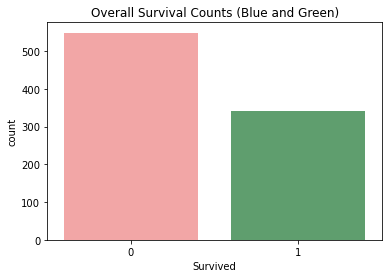

In [10]:
# Plot survival counts
# Custom blue and green color palette
custom_palette = sns.color_palette(["#FF9999", "#55A868"])  # Light Red and Green

# Set the palette for Seaborn plots
sns.set_palette(custom_palette)

# Plot the survival counts
sns.countplot(x='Survived', data=df)
plt.title('Overall Survival Counts (Blue and Green)')
plt.show()

4.2 Survival by Gender


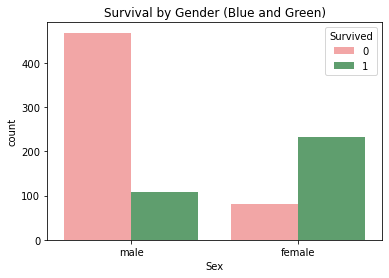

In [11]:
# Plot survival by gender
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender (Blue and Green)')
plt.show()

#Insight: Females might have higher survival rates.


4.3 Survival by Passenger Class

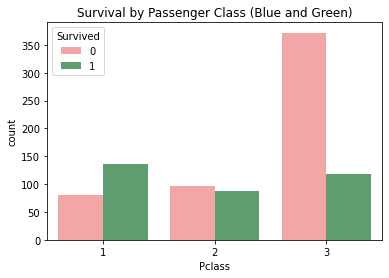

In [12]:
# Plot survival by passenger class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class (Blue and Green)')
plt.show()

4.4 Survival by Age Bin


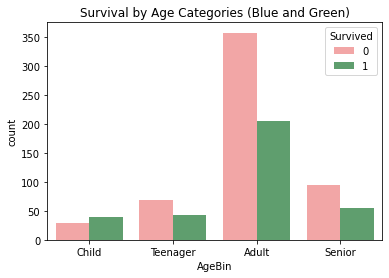

In [13]:
# Plot survival by age bin
sns.countplot(x='AgeBin', hue='Survived', data=df)
plt.title('Survival by Age Categories (Blue and Green)')
plt.show()


Step 5: Data Encoding

Convert categorical variables into numerical format.

5.1 Encoding Categorical Variables


In [14]:
# Map 'Sex' to numerical values
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0}).astype(int)


5.2 One-Hot Encoding


In [15]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Embarked', 'Title', 'AgeBin', 'FareBin'], drop_first=True)
#Explanation: drop_first=True avoids multicollinearity by dropping the first category.


Step 6: Preparing Data for Modeling

6.1 Define Features and Target Variable

In [16]:
# Drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Define features and target
X = df.drop('Survived', axis=1)
y = df['Survived']


6.2 Split Data into Training and Testing Sets


In [17]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 7: Model Building


7.1 Build Random Forest Model


In [18]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

7.2 Model Evaluation


In [19]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


# Explanation:
# Accuracy: Overall correctness of the model.
# Confusion Matrix: Details true vs. predicted classifications.
# Classification Report: Precision, recall, and F1-score for each class.


Accuracy: 0.8156424581005587
Confusion Matrix:
 [[87 18]
 [15 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       105
           1       0.77      0.80      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Step 8: Hyperparameter Tuning

Improve model performance by tuning parameters.

8.1 Define Parameter Grid


In [20]:
# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


8.2 Perform Randomized Search


In [21]:
# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                               n_iter=50, cv=3, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Adjust the max_depth to control how deep each tree can go
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)


8.3 Evaluate Tuned Model


In [22]:
# Best parameters
print('Best Parameters:', rf_random.best_params_)

# Make predictions with the best model
best_model = rf_random.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Evaluate the tuned model
print('Accuracy after Tuning:', accuracy_score(y_test, y_pred_tuned))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_tuned))
print('Classification Report:\n', classification_report(y_test, y_pred_tuned))


Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': False}
Accuracy after Tuning: 0.8770949720670391
Confusion Matrix:
 [[109   8]
 [ 14  48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       117
           1       0.86      0.77      0.81        62

    accuracy                           0.88       179
   macro avg       0.87      0.85      0.86       179
weighted avg       0.88      0.88      0.88       179



Step 9: Feature Importance

Identify which features contribute most to the model.




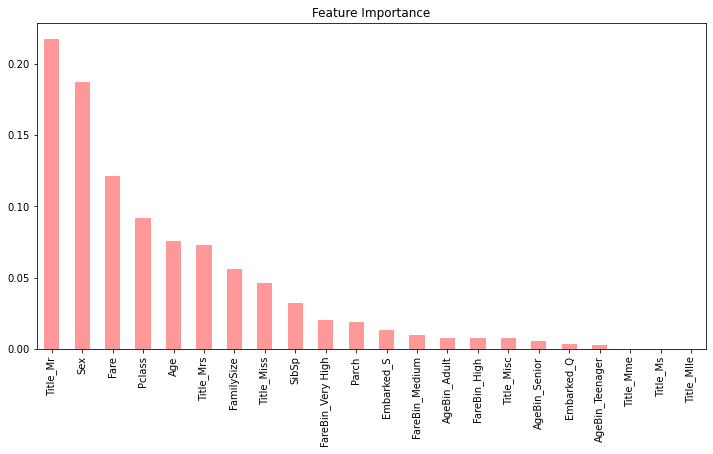

In [23]:
# Feature importance

importances = best_model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Display feature importance
feature_importance.plot(kind='bar', figsize=(12,6))
plt.title('Feature Importance')
plt.show()

# Insight: Features like Fare, Age, Sex, and Title_Mr might be the most significant.




Step 10: Conclusion

Summarize of findings and reflect on the model's performance.

In [24]:
### Conclusion
'''
Key improvements After Tuning:
Accuracy: The accuracy increased significantly from 81.6% to 87.7%, which is a major improvement. The tuned model is better at making correct predictions overall.

Precision for Class 1 (Survived): Precision for predicting survivors increased from 77% to 86%, meaning that when the model predicts someone survived, it is much more likely to be correct.

Precision & Recall for Class 0 (Didn't Survive):

The recall for non-survivors (Class 0) improved from 83% to 93%, meaning the model is now better at identifying passengers who didn't survive.
Precision for non-survivors increased as well, from 85% to 89%.
Slight Drop in Recall for Survivors: The only trade-off was a small drop in recall for survivors (Class 1) from 80% to 77%, meaning that the model missed a few more survivors.

Why These Changes Happened:
Increasing n_estimators to 200 allowed the model to make predictions by averaging over more trees, which improved its stability and performance.
Decreasing min_samples_leaf and min_samples_split allowed the model to capture more subtle patterns by letting the trees split more often.
Limiting max_depth to 20 helped prevent the trees from growing too deep, reducing overfitting and improving generalization.
Disabling bootstrap means that all samples are used for each tree, which can sometimes lead to better performance, especially when the data size is relatively small.

- **Key Features**: `Fare`, `Age`, and `Sex` were significant predictors of survival.

- **Insights**:
  - Higher fare-paying passengers had better survival rates.
  - Females and younger passengers were more likely to survive.

'''

"\nKey improvements After Tuning:\nAccuracy: The accuracy increased significantly from 81.6% to 87.7%, which is a major improvement. The tuned model is better at making correct predictions overall.\n\nPrecision for Class 1 (Survived): Precision for predicting survivors increased from 77% to 86%, meaning that when the model predicts someone survived, it is much more likely to be correct.\n\nPrecision & Recall for Class 0 (Didn't Survive):\n\nThe recall for non-survivors (Class 0) improved from 83% to 93%, meaning the model is now better at identifying passengers who didn't survive.\nPrecision for non-survivors increased as well, from 85% to 89%.\nSlight Drop in Recall for Survivors: The only trade-off was a small drop in recall for survivors (Class 1) from 80% to 77%, meaning that the model missed a few more survivors.\n\nWhy These Changes Happened:\nIncreasing n_estimators to 200 allowed the model to make predictions by averaging over more trees, which improved its stability and perfor

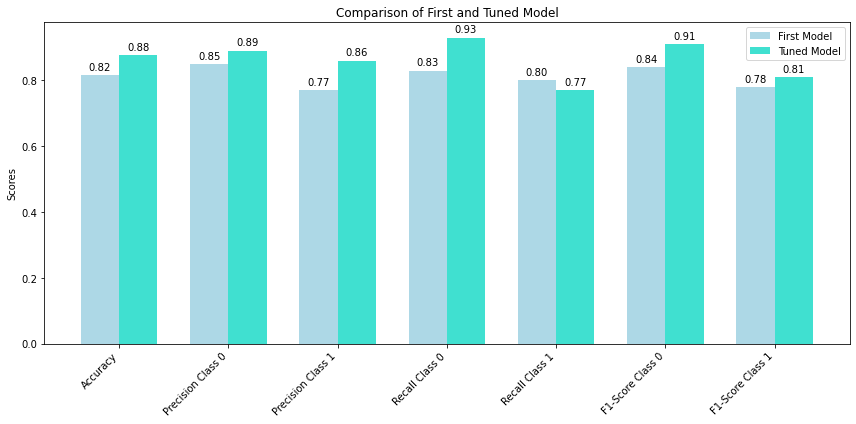

In [25]:
# Metrics for the first model
first_model_metrics = {
    'Accuracy': 0.8156,
    'Precision Class 0': 0.85,
    'Precision Class 1': 0.77,
    'Recall Class 0': 0.83,
    'Recall Class 1': 0.80,
    'F1-Score Class 0': 0.84,
    'F1-Score Class 1': 0.78
}

# Metrics for the second model (after tuning)
second_model_metrics = {
    'Accuracy': 0.8771,
    'Precision Class 0': 0.89,
    'Precision Class 1': 0.86,
    'Recall Class 0': 0.93,
    'Recall Class 1': 0.77,
    'F1-Score Class 0': 0.91,
    'F1-Score Class 1': 0.81
}

# Create categories
categories = list(first_model_metrics.keys())
first_model_values = list(first_model_metrics.values())
second_model_values = list(second_model_metrics.values())

# Number of metrics
N = len(categories)

# Set up the plot with increased width
fig, ax = plt.subplots(figsize=(12, 6))  # Increase the width of the plot here (12 is the width, 6 is the height)

# Set bar width
width = 0.35  # Width of the bars

# Plot
ind = np.arange(N)

# First model bar (light blue)
bar1 = ax.bar(ind - width/2, first_model_values, width, label='First Model', color='#ADD8E6')  # Light Blue

# Second model bar (turquoise)
bar2 = ax.bar(ind + width/2, second_model_values, width, label='Tuned Model', color='#40E0D0')  # Turquoise

# Add labels on top of the bars for the first model
for i, v in enumerate(first_model_values):
    ax.text(i - width/2, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

# Add labels on top of the bars for the second model
for i, v in enumerate(second_model_values):
    ax.text(i + width/2, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

# Labels and title
ax.set_ylabel('Scores')
ax.set_title('Comparison of First and Tuned Model')
ax.set_xticks(ind)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Apendix - another round to improve the model by minimizing the number of features based on feature importance.

Step 1: Feature Importance Review – We will identify the most important features and drop the less significant ones.


In [27]:
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)

print(feature_importance)

Title_Mr             0.217550
Sex                  0.187108
Fare                 0.121283
Pclass               0.092215
Age                  0.075974
Title_Mrs            0.072860
FamilySize           0.056108
Title_Miss           0.046085
SibSp                0.032490
FareBin_Very High    0.020658
Parch                0.019001
Embarked_S           0.013596
FareBin_Medium       0.009853
AgeBin_Adult         0.008015
FareBin_High         0.007550
Title_Misc           0.007505
AgeBin_Senior        0.005627
Embarked_Q           0.003609
AgeBin_Teenager      0.002914
Title_Mme            0.000000
Title_Ms             0.000000
Title_Mlle           0.000000
dtype: float64


Step 2: Drop Low-Importance Features


In [28]:
# Keep only important features
important_features = ['Title_Mr', 'Sex', 'Fare', 'Pclass', 'Age', 'Title_Mrs', 'FamilySize', 'Title_Miss', 'SibSp', 'FareBin_Very High']

# Create reduced feature datasets
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Retrain the Random Forest model with reduced features
rf_model_reduced = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model_reduced.fit(X_train_reduced, y_train)

# Evaluate the reduced feature model
y_pred_reduced = rf_model_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
conf_matrix_reduced = confusion_matrix(y_test, y_pred_reduced)
class_report_reduced = classification_report(y_test, y_pred_reduced)

print(f'Accuracy (Reduced Features): {accuracy_reduced}')
print('Confusion Matrix (Reduced Features):')
print(conf_matrix_reduced)
print('Classification Report (Reduced Features):')
print(class_report_reduced)


Accuracy (Reduced Features): 0.8156424581005587
Confusion Matrix (Reduced Features):
[[100  17]
 [ 16  46]]
Classification Report (Reduced Features):
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       117
           1       0.73      0.74      0.74        62

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



Step 3: Compare All Models in One Graph


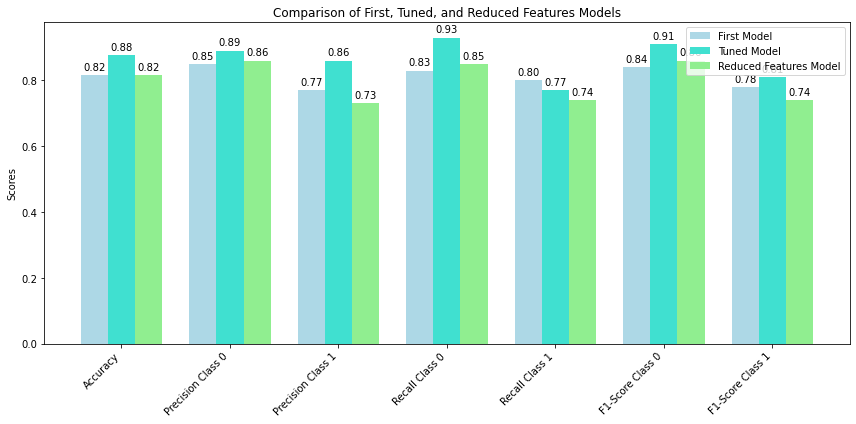

In [31]:
# Metrics for the first model
first_model_metrics = {
    'Accuracy': 0.8156,
    'Precision Class 0': 0.85,
    'Precision Class 1': 0.77,
    'Recall Class 0': 0.83,
    'Recall Class 1': 0.80,
    'F1-Score Class 0': 0.84,
    'F1-Score Class 1': 0.78
}

# Metrics for the second model (after tuning)
second_model_metrics = {
    'Accuracy': 0.8771,
    'Precision Class 0': 0.89,
    'Precision Class 1': 0.86,
    'Recall Class 0': 0.93,
    'Recall Class 1': 0.77,
    'F1-Score Class 0': 0.91,
    'F1-Score Class 1': 0.81
}

# Metrics for the third model (reduced features)
third_model_metrics = {
    'Accuracy': 0.8156,
    'Precision Class 0': 0.86,
    'Precision Class 1': 0.73,
    'Recall Class 0': 0.85,
    'Recall Class 1': 0.74,
    'F1-Score Class 0': 0.86,
    'F1-Score Class 1': 0.74
}

# Create categories
categories = list(first_model_metrics.keys())
first_model_values = list(first_model_metrics.values())
second_model_values = list(second_model_metrics.values())
third_model_values = list(third_model_metrics.values())

# Number of metrics
N = len(categories)

# Set up the plot with increased width
fig, ax = plt.subplots(figsize=(12, 6))

# Set bar width
width = 0.25  # Width of the bars

# Plot
ind = np.arange(N)

# First model bar (light blue)
bar1 = ax.bar(ind - width, first_model_values, width, label='First Model', color='#ADD8E6')  # Light Blue

# Second model bar (turquoise)
bar2 = ax.bar(ind, second_model_values, width, label='Tuned Model', color='#40E0D0')  # Turquoise

# Third model bar (light green)
bar3 = ax.bar(ind + width, third_model_values, width, label='Reduced Features Model', color='#90EE90')  # Light Green

# Add labels on top of the bars for the first model
for i, v in enumerate(first_model_values):
    ax.text(i - width, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

# Add labels on top of the bars for the second model
for i, v in enumerate(second_model_values):
    ax.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

# Add labels on top of the bars for the third model
for i, v in enumerate(third_model_values):
    ax.text(i + width, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

# Labels and title
ax.set_ylabel('Scores')
ax.set_title('Comparison of First, Tuned, and Reduced Features Models')
ax.set_xticks(ind)
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()
